In [54]:
import networkx as nx
import torch 
from torch_geometric.utils import to_networkx
import pandas as pd
import matplotlib.pyplot as plt
import openslide as osd
import numpy as np 

In [33]:
path = '/mnt/usb/huamenglei/GC_2300/GC/superpatch/1413117_0.75_graph_torch_4.3_artifact_sophis_final.pt'
data = torch.load(path)
Position_path = '/mnt/usb/huamenglei/GC_2300/GC/superpatch/1413117_0.75_4.3_artifact_sophis_final.csv'
Position_pd = pd.read_csv(Position_path)
Location_path = '/mnt/usb/huamenglei/GC_2300/GC/original/1413117_node_location_list.csv'
Location_pd = pd.read_csv(Location_path)

In [40]:
data

Data(edge_attr=[46022, 2], edge_index=[2, 46022], pos=[2382, 2], x=[2382, 1794])

In [55]:
row = np.array(data.edge_index[0])
col = np.array(data.edge_index[1])

In [74]:
WSI_node_idx = Position_pd['Unnamed: 0.1'].tolist()
WSI_node_idx = [int(item) for item in WSI_node_idx]
WSI_Location = Location_pd.iloc[WSI_node_idx]
X_pos = WSI_Location['X'].tolist()
Y_pos = WSI_Location['Y'].tolist()
X_Y_pos = [(X*256/16, Y*256/16) for X, Y in zip(X_pos, Y_pos)]
pos_dict = zip(Position_pd['Unnamed: 0'].tolist(), X_Y_pos)
pos_dict = dict(pos_dict)
WSI_edge_index = [(row_item, col_item) for row_item, col_item in zip(row, col)]
WSI_graph = nx.Graph()
WSI_graph.add_nodes_from(list(range(len(WSI_node_idx))))
WSI_graph.add_edges_from(WSI_edge_index)
# 去自环
WSI_graph.remove_edges_from(nx.selfloop_edges(WSI_graph))

In [58]:
WSI = osd.open_slide('/mnt/usb3/1.WSI_数据/1.GC_2300/WSI数据/1413117.svs')
WSI_level = 2
Downsample_ratio = int(WSI.level_downsamples[WSI_level])
WSI_width, WSI_height = WSI.level_dimensions[WSI_level]
WSI_image = WSI.read_region((0, 0), WSI_level, (WSI_width, WSI_height))

In [73]:
WSI.level_downsamples

(1.0, 4.000342224584243, 16.005829086384463)

In [72]:
WSI_image.size

(2474, 1966)

In [ ]:
g = to_networkx(data)
g.remove_edges_from(nx.selfloop_edges(g))

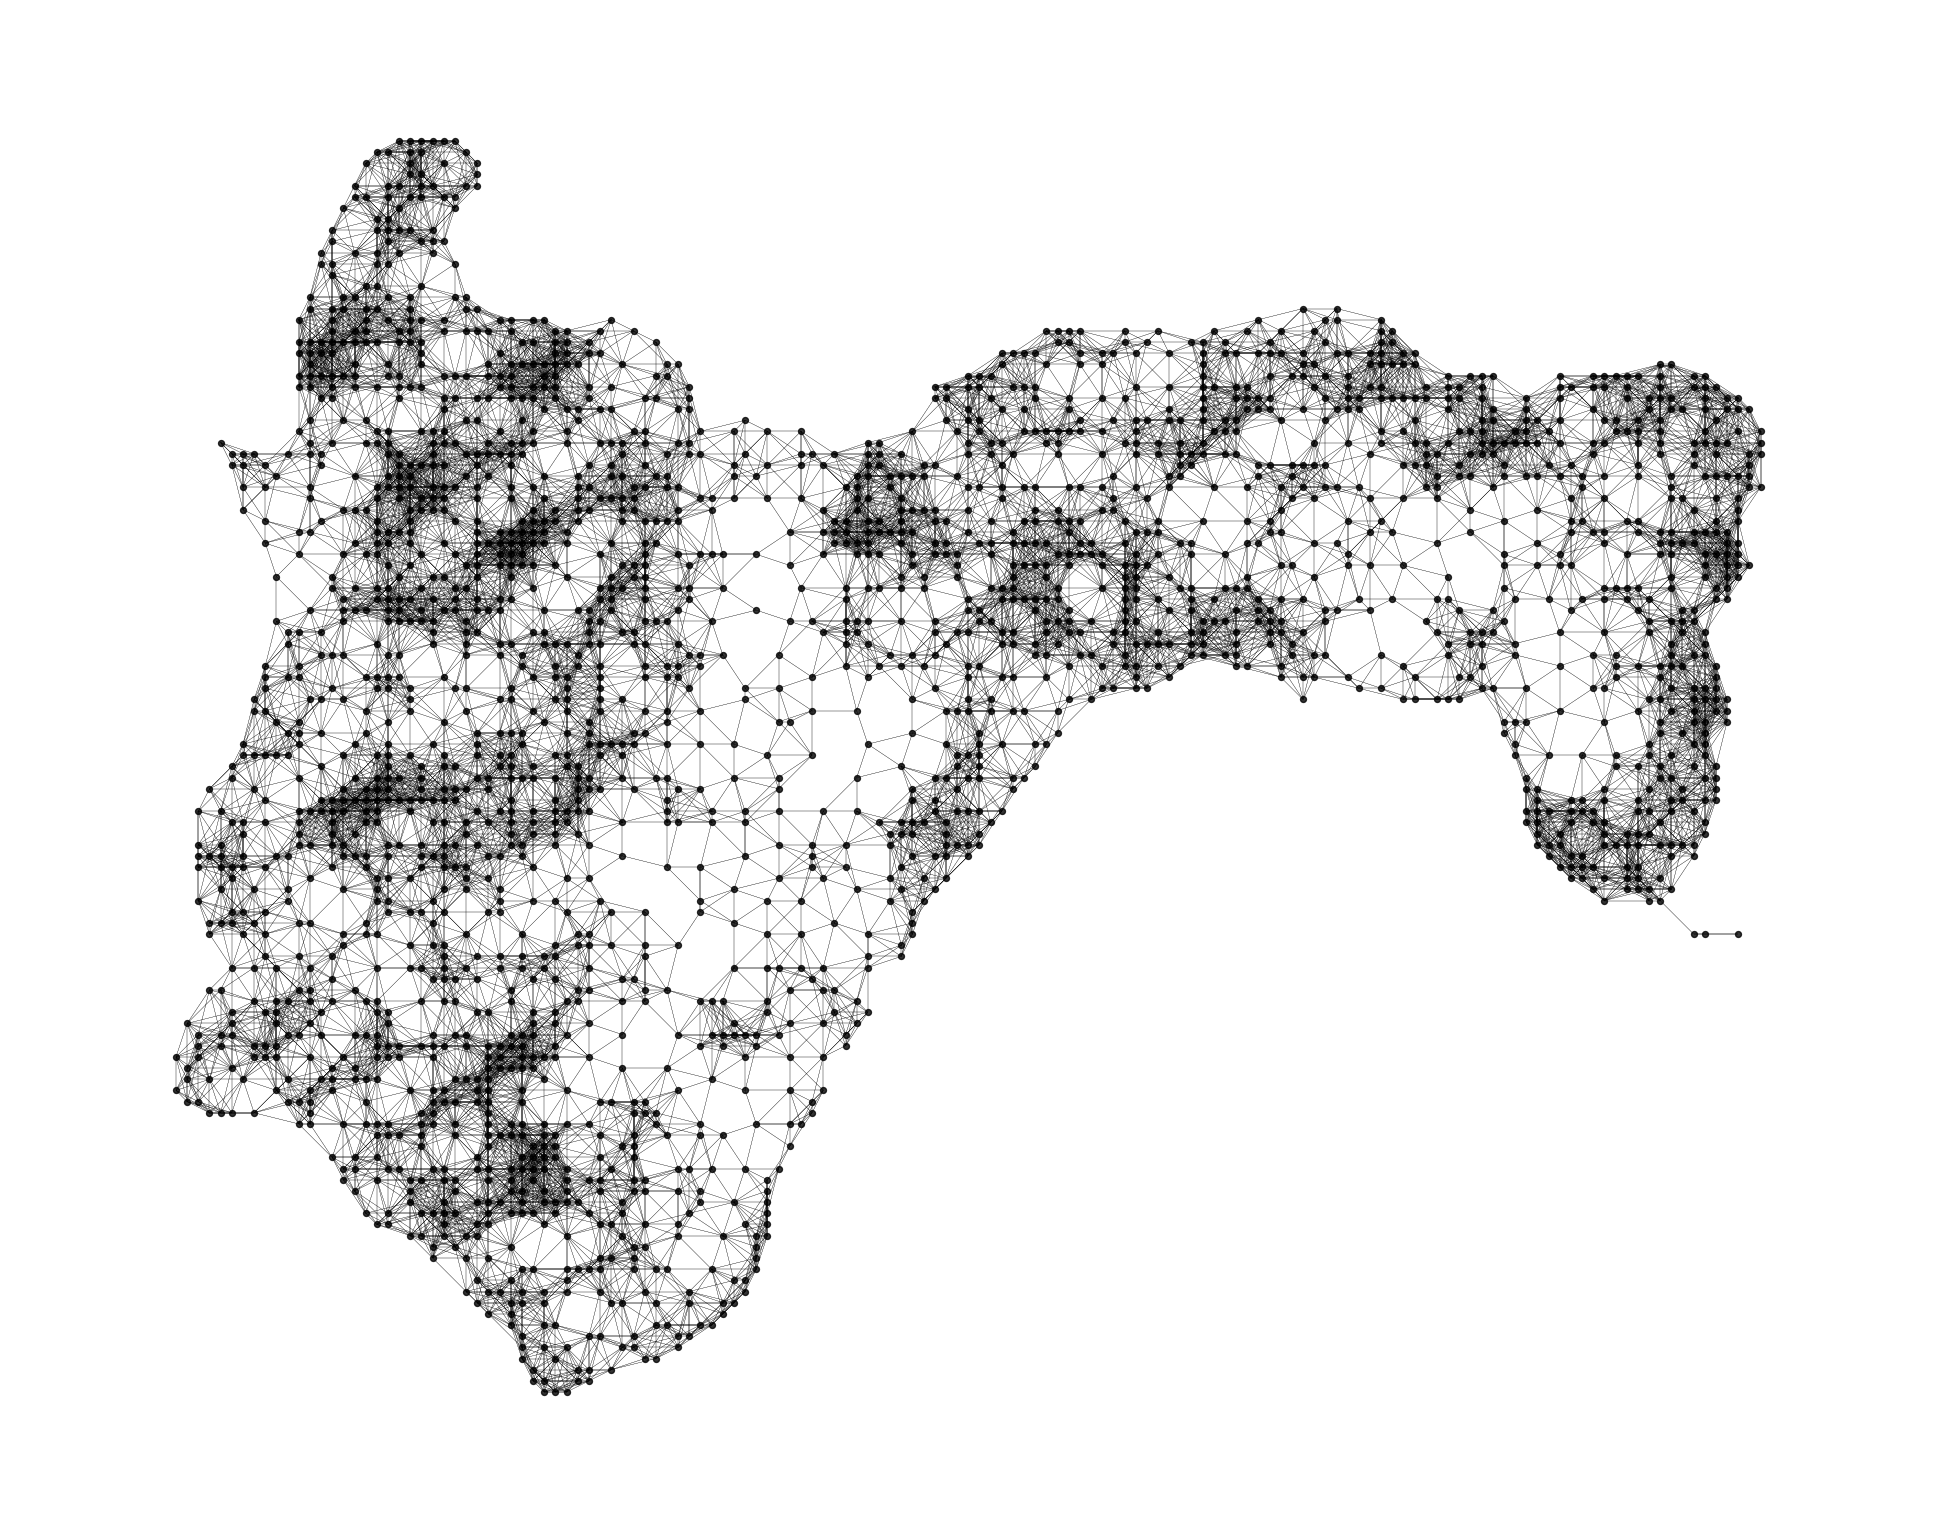

In [77]:

my_dpi = 96
plt.figure(figsize=(WSI_image.size[0] / my_dpi, WSI_image.size[1] / my_dpi), dpi=96)
# plt.imshow(WSI_image)
plt.axis('off')
# plt.imshow(WSI_image)
# nx.draw_networkx(WSI_graph, pos=pos_dict, node_size=20, node_color='black', width=0.2, alpha=0.8, arrows=False,
                    # with_labels=False)
nx.draw_networkx(g, pos=pos_dict, node_size=20, node_color='black', width=0.2, alpha=0.8, arrows=False,
                     with_labels=False)
plt.show()

In [78]:
data

Data(edge_attr=[46022, 2], edge_index=[2, 46022], pos=[2382, 2], x=[2382, 1794])

In [ ]:
pos_dict = 

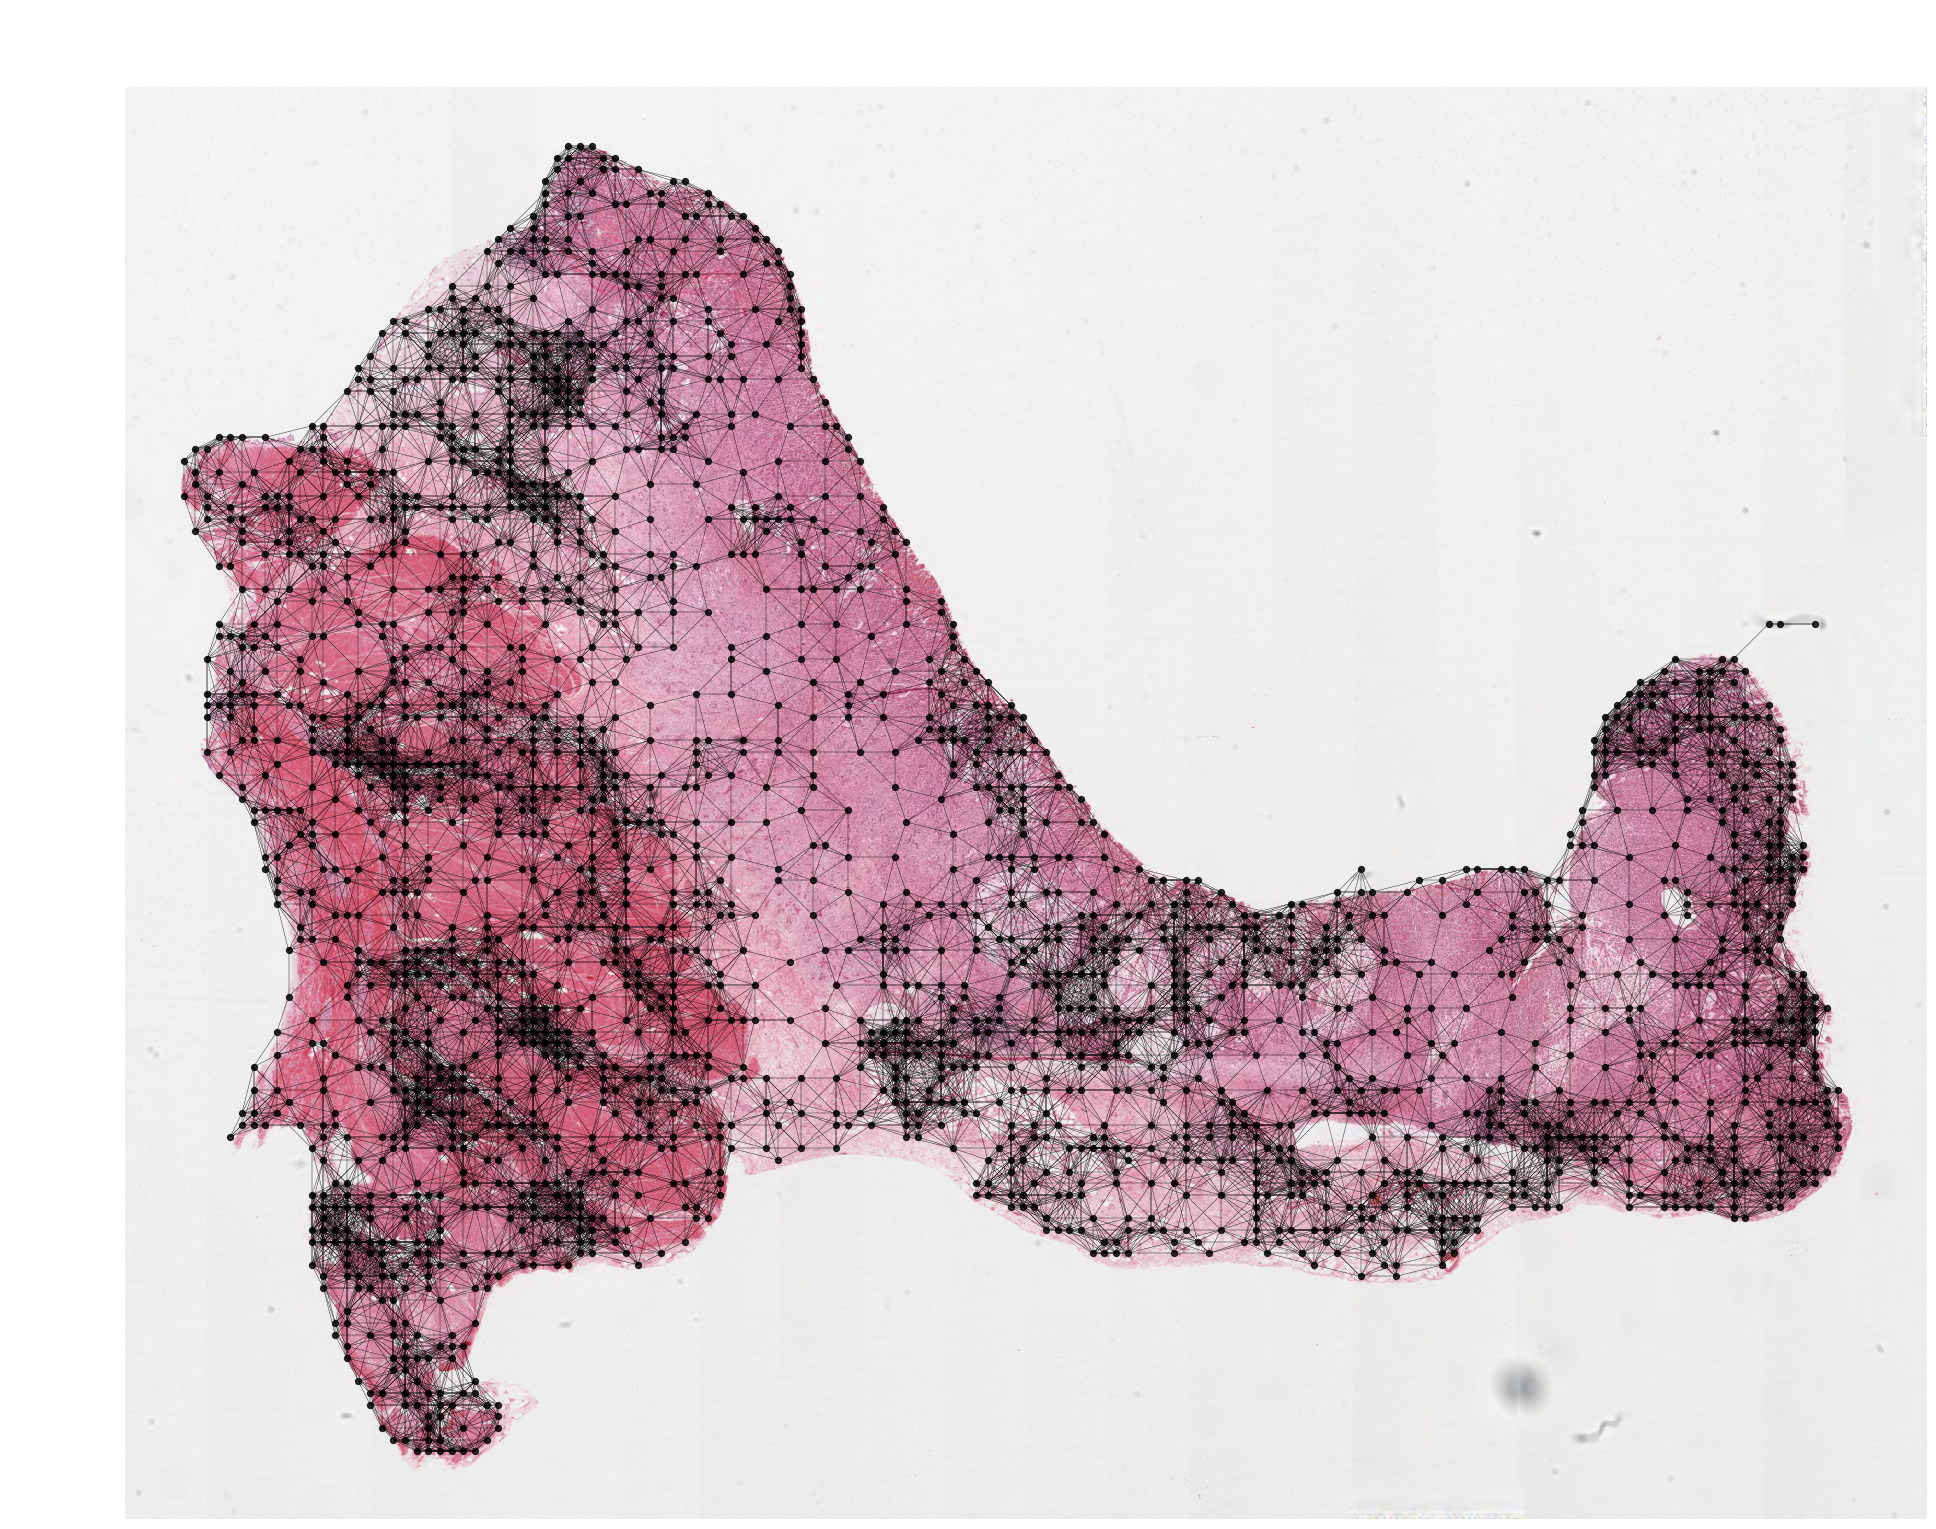

In [80]:
WSI = osd.open_slide('/mnt/usb3/1.WSI_数据/1.GC_2300/WSI数据/1413117.svs')
# 获取wsi的低分辨率图像
WSI_level = 2
Downsample_ratio = int(WSI.level_downsamples[WSI_level])
WSI_width, WSI_height = WSI.level_dimensions[WSI_level]
WSI_image = WSI.read_region((0, 0), WSI_level, (WSI_width, WSI_height))

g = to_networkx(data)
g.remove_edges_from(nx.selfloop_edges(g))

my_dpi = 96
plt.figure(figsize=(WSI_image.size[0] / my_dpi, WSI_image.size[1] / my_dpi), dpi=96)
plt.imshow(WSI_image)
plt.axis('off')

nx.draw_networkx(g, pos=pos_dict, node_size=20, node_color='black', width=0.2, alpha=0.8, arrows=False,
                     with_labels=False)
plt.show()